In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
import math

from src.processing.txt_loading import txt_to_list
from src.processing.characterise_biofilm import characterise_both_biofilm_images, characterise_biofilm_image
from src.processing.constants import BUCKLING_PATH, EDGE_TRACKING_PATH
from src.processing.labelled_regions import label_regions, characterise_regions
from src.processing.histogram_processing import nth_histogram_percentile

In [2]:
bright_img = imread(str(BUCKLING_PATH / "200920_normallight_nobg_edges_gaussblur_enhance_inverted.tif"))
bio_img = imread(str(BUCKLING_PATH / "200920_biolight_nobg_nooutliers_despeckle_enhance.tif"))

In [3]:
slice_no_bio = 120
slice_no_bright = int(slice_no_bio*1.403726708)

In [4]:
imageb = bio_img[slice_no_bio]
imagen = bright_img[slice_no_bright]

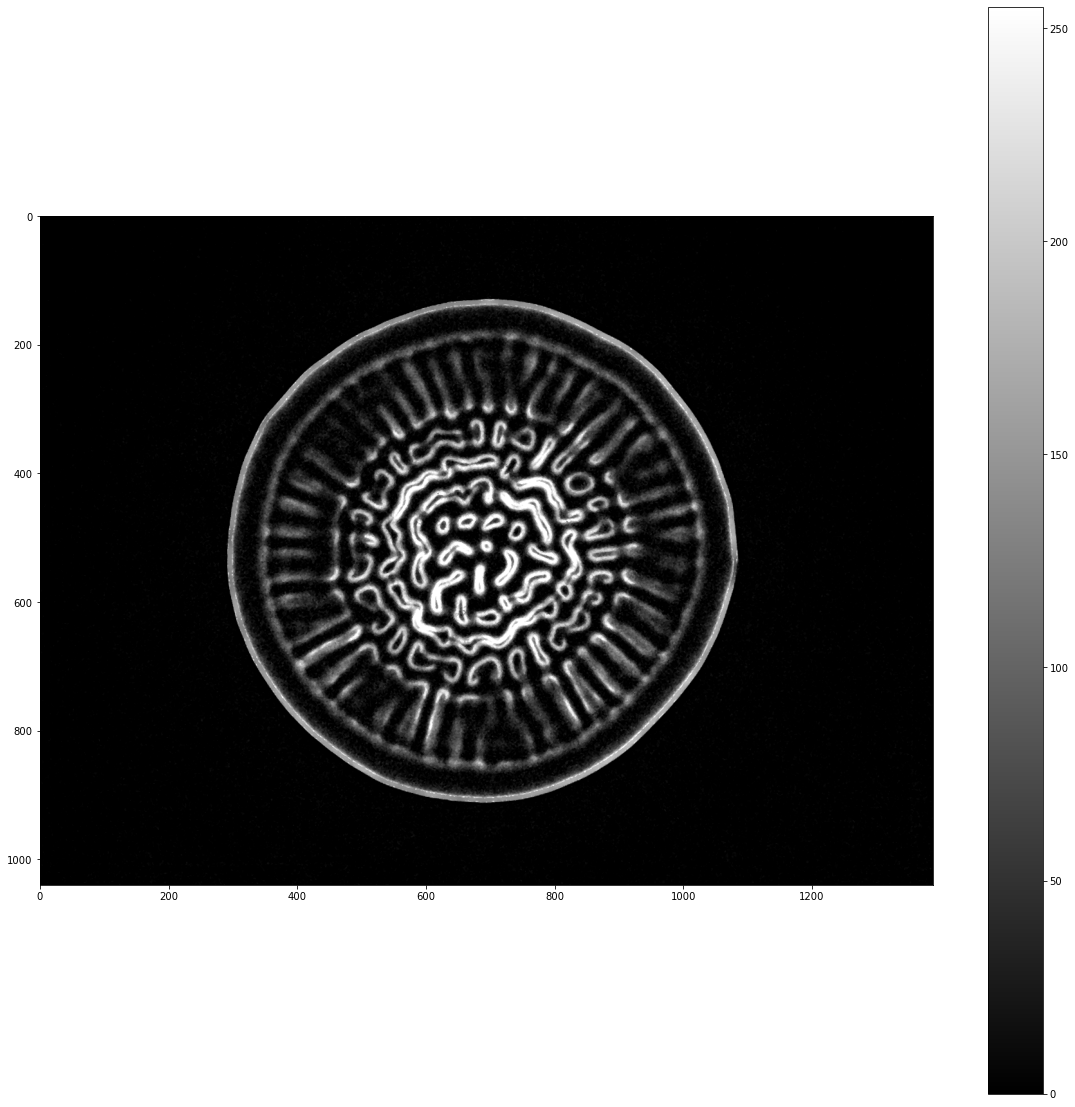

In [5]:
plt.figure(figsize=(20,20))
plt.imshow(imageb, cmap = 'gray')
plt.colorbar()

<BarContainer object of 256 artists>

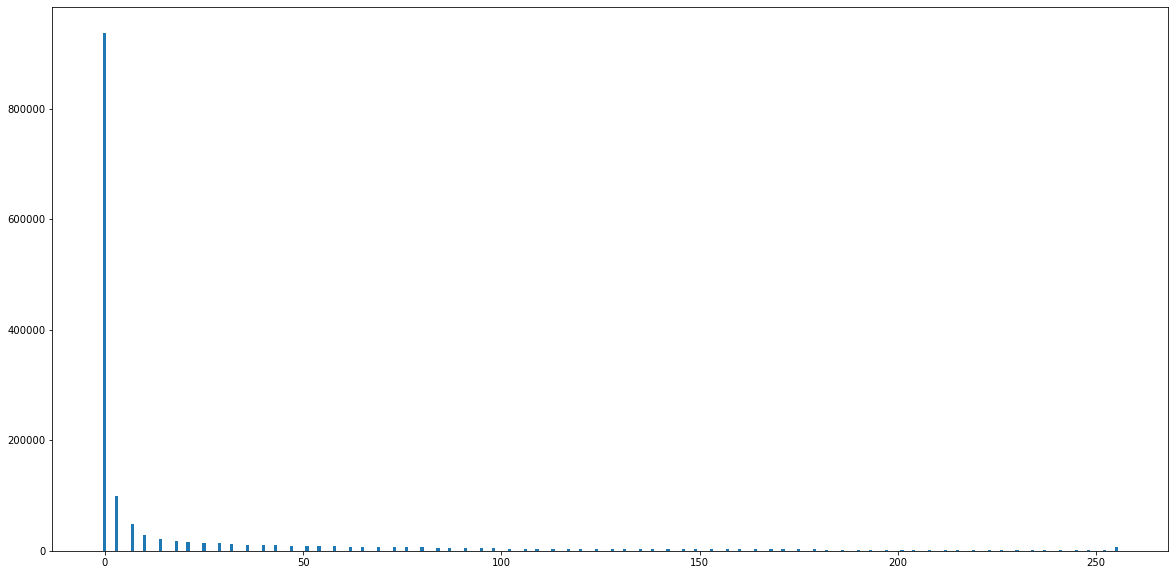

In [6]:
histogram = np.bincount(np.ravel(imageb))
x = np.arange(0,len(histogram))
len(x)
plt.figure(figsize = (20,10))
plt.bar(x, histogram)

In [7]:
print(nth_histogram_percentile(imageb, 90))

69


In [8]:
print(nth_histogram_percentile(imageb, 10))

0


In [11]:
np.min(imageb)

0

In [55]:
max_pixel_value = np.max(imagen)
imagen_normalized = imagen/max_pixel_value

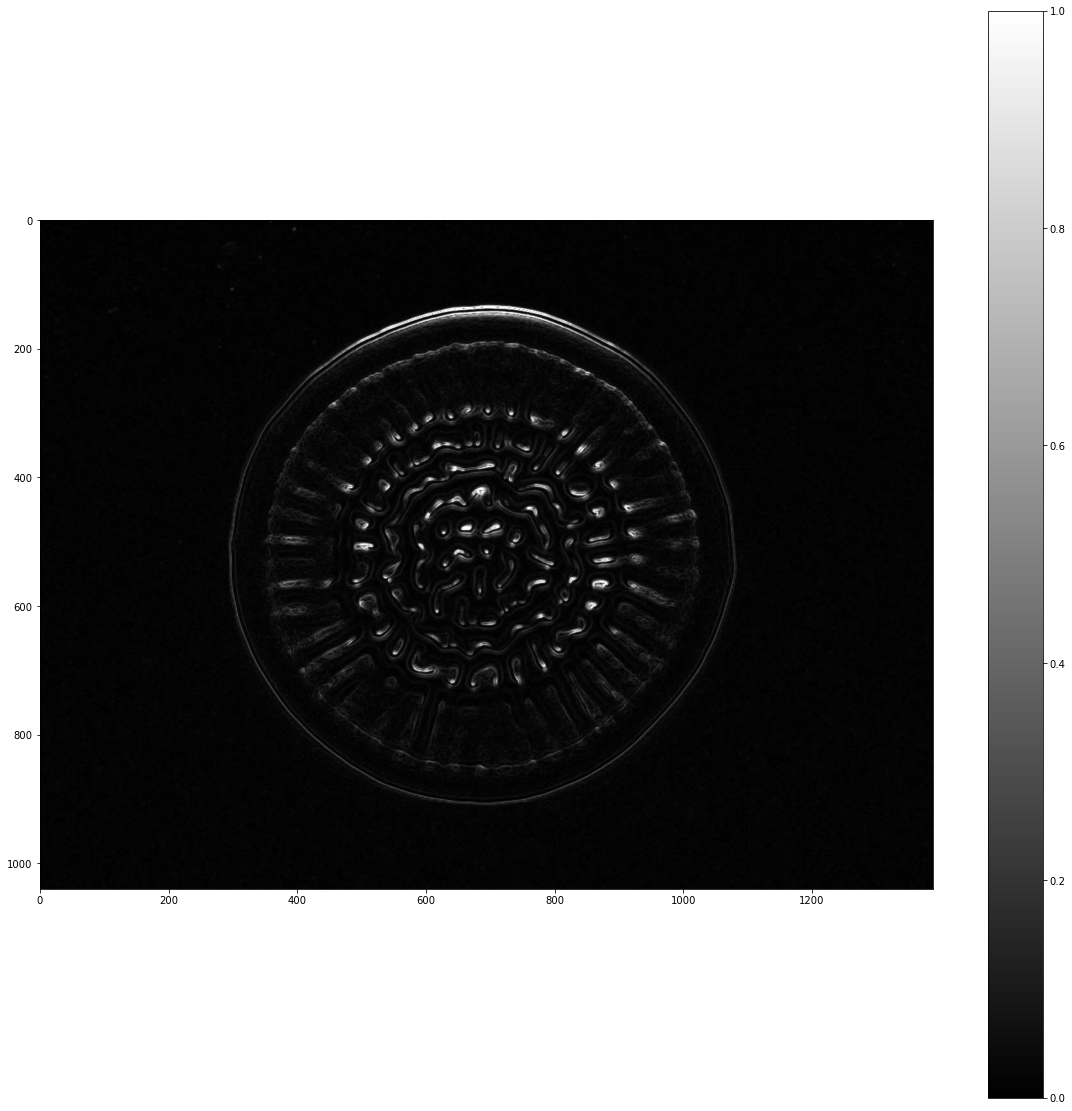

In [56]:
plt.figure(figsize=(20,20))
plt.imshow(imagen_normalized, cmap = 'gray')
plt.colorbar()

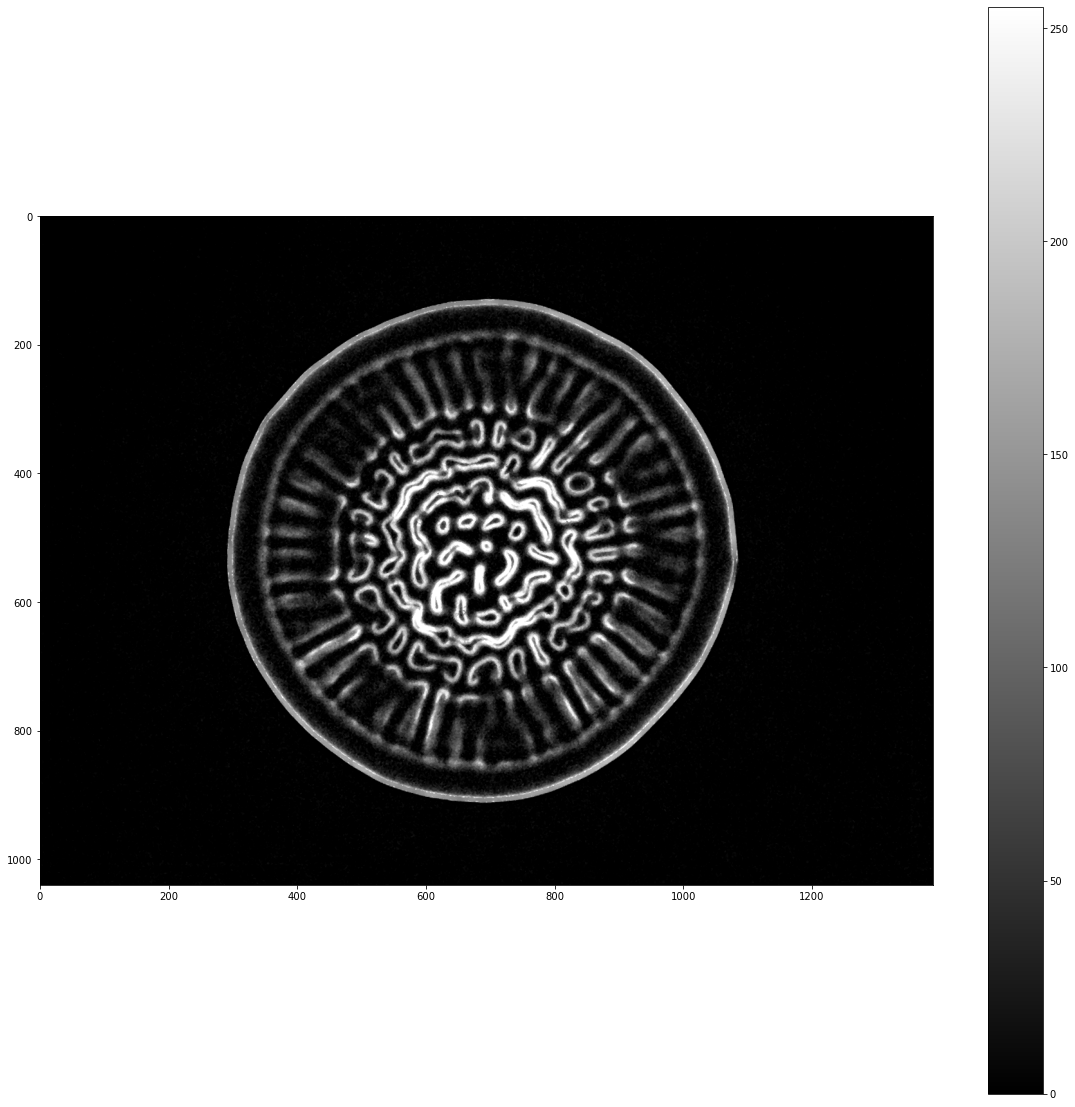

In [57]:
plt.figure(figsize=(20,20))
plt.imshow(imageb, cmap = 'gray')
plt.colorbar()

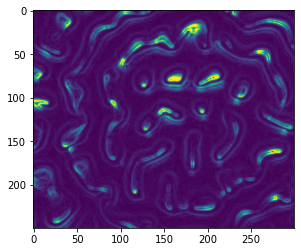

In [58]:
plt.imshow(imagen_normalized[400:650, 500:800])

In [59]:
heights = np.ravel(imagen_normalized[400:650, 500:800])
light = np.ravel(imageb[400:650, 500:800])

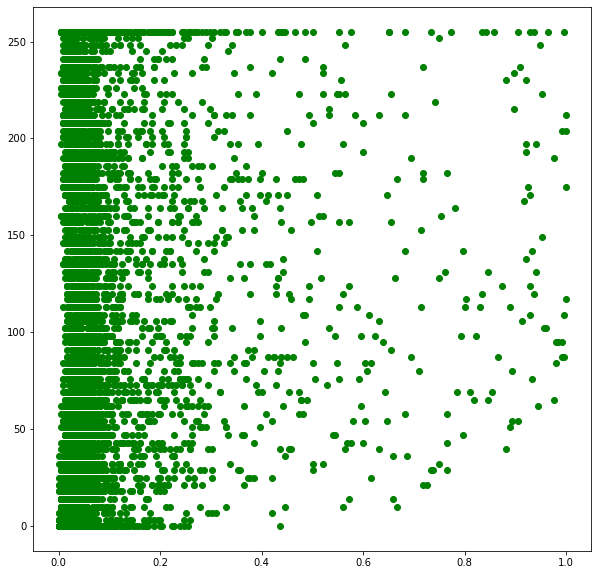

In [60]:
plt.figure(figsize=(10,10))
plt.plot(heights[::10], light[::10], 'go')